In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
super_data = pd.read_csv('super_covid_data.csv')

In [70]:
super_data.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


#  Q1

#  Wyoming State Mean, Median and Mode

In [71]:
# Selecting data specific to Wyoming state from the super_data DataFrame
wyoming_data = super_data[super_data['State_x'] == 'WY']

# Generating a list of column names that correspond to COVID-19 case and Deaths  data 
# from July 2020 to December 2020. These columns end with '_x' and '_y.
columns_cases = [col for col in wyoming_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
columns_deaths = [col for col in wyoming_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']


def calculate_weekly_stats(data, columns):
     # Melting the DataFrame so that each row represents a single day's count for a particular column
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    
   # Grouping the data by week and calculating sum, mean, and median
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))
    weekly_stats = weekly_data['count'].agg(['mean', 'median'])
    # Calculating the mode for each week
    mode_df = weekly_data['count'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.NaN)
    weekly_stats['mode'] = mode_df
    
    return weekly_stats

# Applying the function to calculate weekly case and deaths statistics for Wyoming
weekly_cases_stats = calculate_weekly_stats(wyoming_data, columns_cases)

weekly_deaths_stats = calculate_weekly_stats(wyoming_data, columns_deaths)

# Print out
print("Weekly Cases Stats:")
print(weekly_cases_stats.head())  
print("\nWeekly Deaths Stats:")
print(weekly_deaths_stats.head())  


Weekly Cases Stats:
                  mean  median  mode
date                                
2020-07-05   68.600000    27.0     2
2020-07-12   76.900621    29.0    27
2020-07-19   87.993789    38.0     4
2020-07-26  101.745342    44.0     4
2020-08-02  116.291925    56.0     5

Weekly Deaths Stats:
                mean  median  mode
date                              
2020-07-05  0.869565     0.0     0
2020-07-12  0.900621     0.0     0
2020-07-19  1.000000     0.0     0
2020-07-26  1.080745     0.0     0
2020-08-02  1.086957     0.0     0


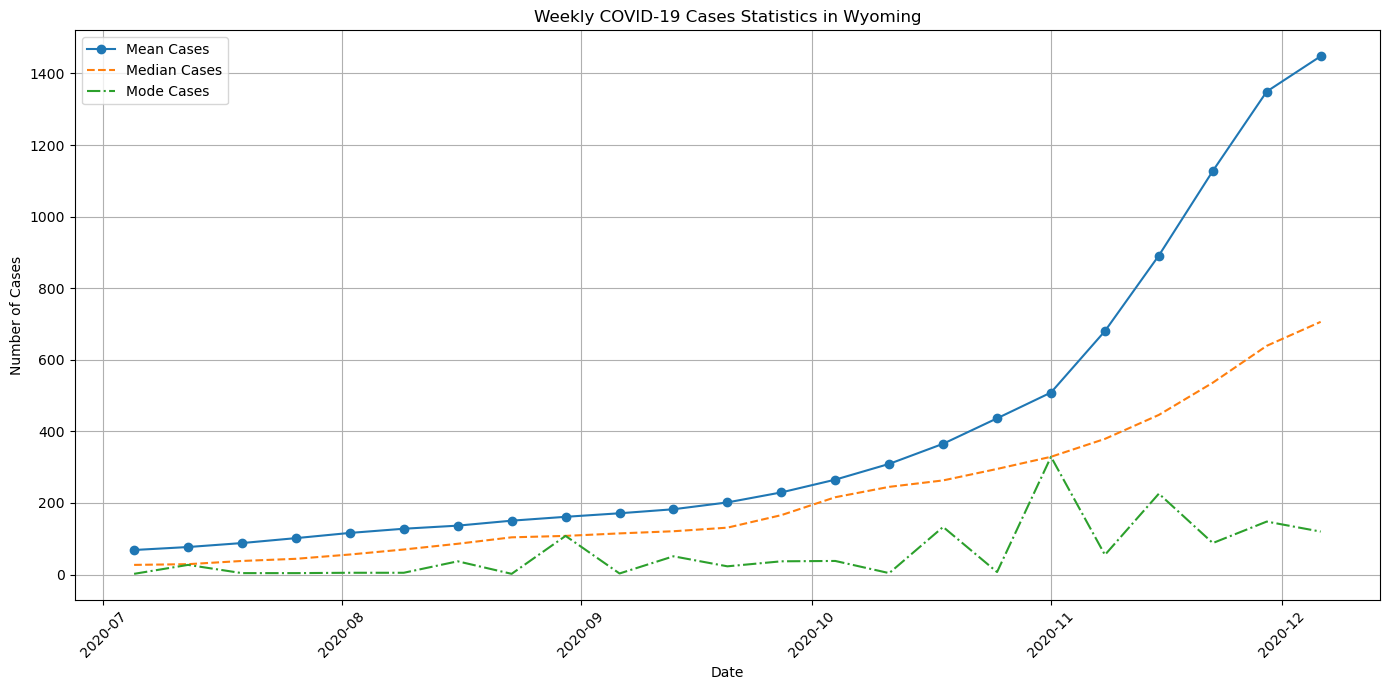

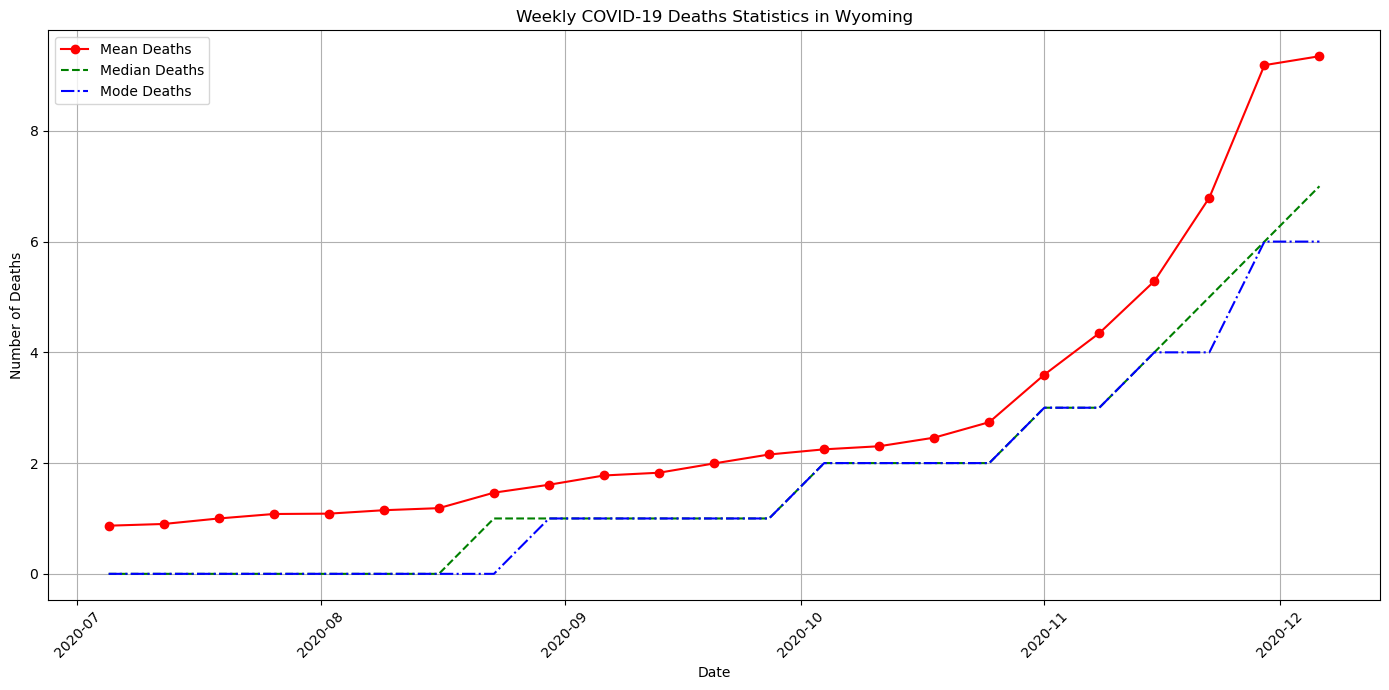

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mean'], label='Mean Cases', marker='o')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['median'], label='Median Cases', linestyle='--')
plt.plot(weekly_cases_stats.index, weekly_cases_stats['mode'], label='Mode Cases', linestyle='-.')
plt.title('Weekly COVID-19 Cases Statistics in Wyoming')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mean'], label='Mean Deaths', marker='o', color='red')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['median'], label='Median Deaths', linestyle='--', color='green')
plt.plot(weekly_deaths_stats.index, weekly_deaths_stats['mode'], label='Mode Deaths', linestyle='-.', color='blue')
plt.title('Weekly COVID-19 Deaths Statistics in Wyoming')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Q2

# Selection Five State from Super Covid data and mean and median statistics per 100,000 population for the state

In [73]:
# Dictionary containing the population of selected states for normalization purposes
population = {
    'WY': 578759,  
    'NC': 10488084,  
    'SC': 5148714,  
    'CO': 5758736,  
    'AZ': 7278717, 
    'TX': 28995881,
}

# Function to prepare and normalize COVID-19 data for a given state
def prepare_state_data(state_code):
    state_data = super_data[super_data['State_x'] == state_code]
    # Identify columns corresponding to cases (ending with '_x') and deaths (ending with '_y') 
    # within the specified date range (July 2020 to December 2020)
    columns_cases = [col for col in state_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
    columns_deaths = [col for col in state_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']
    # Calculate weekly statistics (mean, median) for cases and deaths
    weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)
    # Normalize the mean and median statistics per 100,000 population for the state
    weekly_cases_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population[state_code]) * 100000
    weekly_deaths_stats[['mean', 'median']] = (weekly_deaths_stats[['mean', 'median']] / population[state_code]) * 100000
     # Return the normalized mean statistics for both cases and deaths
    return weekly_cases_stats['mean'], weekly_deaths_stats['mean'] 


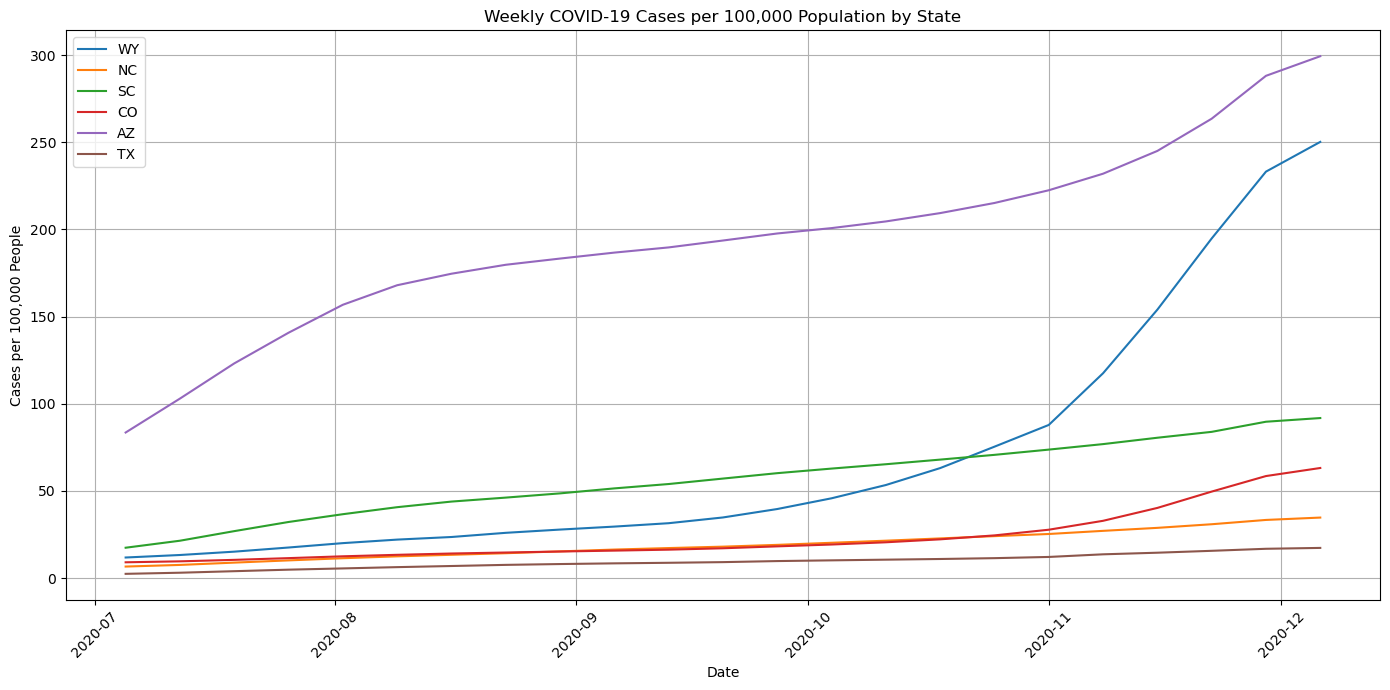

In [74]:
plt.figure(figsize=(14, 7))

for state_code in ['WY', 'NC', 'SC', 'CO', 'AZ', 'TX']:
    weekly_cases_mean, _ = prepare_state_data(state_code)
    plt.plot(weekly_cases_mean.index, weekly_cases_mean, label=state_code)

plt.title('Weekly COVID-19 Cases per 100,000 Population by State')
plt.xlabel('Date')
plt.ylabel('Cases per 100,000 People')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Per 100,000 Population for deaths

In [75]:
# Define a function to prepare and analyze COVID-19 data for a given state
def prepare_state_data(state_code):
    
    state_data = super_data[super_data['State_x'] == state_code]
        # Identify columns related to COVID-19 cases and deaths from July 2020 to December 2020
    columns_cases = [col for col in state_data if col.endswith('_x') and '2020-07' <= col.split('_')[0] <= '2020-12']
    columns_deaths = [col for col in state_data if col.endswith('_y') and '2020-07' <= col.split('_')[0] <= '2020-12']
     # Calculate weekly statistics (mean, median) for cases and deaths using the identified columns
    weekly_cases_stats = calculate_weekly_stats(state_data, columns_cases)
    weekly_deaths_stats = calculate_weekly_stats(state_data, columns_deaths)

     # Normalize the weekly cases and deaths statistics per 100,000 population for comparison
    weekly_cases_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population[state_code]) * 100000
    weekly_deaths_stats[['mean', 'median']] = (weekly_deaths_stats[['mean', 'median']] / population[state_code]) * 100000
    

    return weekly_cases_stats['mean'], weekly_deaths_stats['mean']


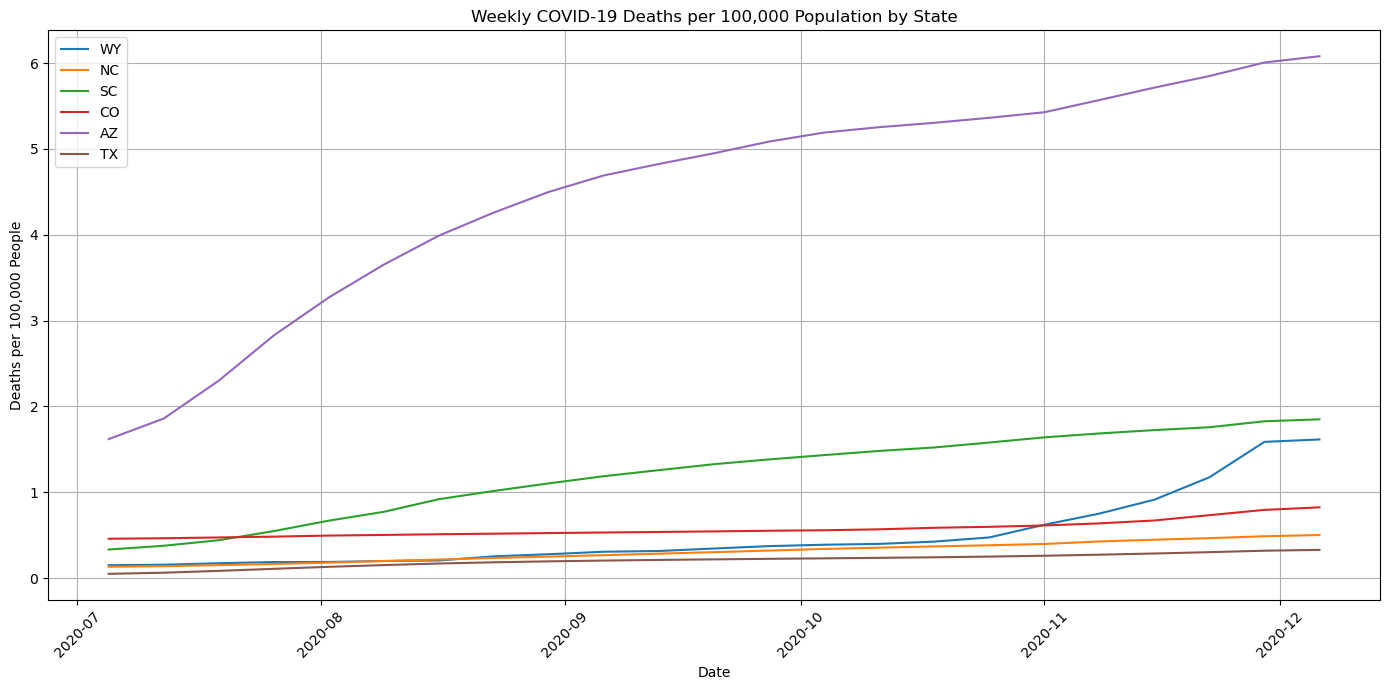

In [76]:
plt.figure(figsize=(14, 7))

for state_code in ['WY', 'NC', 'SC', 'CO', 'AZ', 'TX']:
    _, weekly_deaths_mean = prepare_state_data(state_code)  
    plt.plot(weekly_deaths_mean.index, weekly_deaths_mean, label=state_code)

plt.title('Weekly COVID-19 Deaths per 100,000 Population by State')
plt.xlabel('Date')
plt.ylabel('Deaths per 100,000 People')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Upon examining the weekly COVID-19 cases and deaths per 100,000 population across several states, with a particular focus on Arizona (AZ) and Wyoming (WY), it is evident that there was a substantial increase in COVID-19 metrics during the holiday season, notably in November and December. This period, encompassing major holidays such as Thanksgiving and Christmas, is characterized by heightened travel and social gatherings, which likely played a pivotal role in the virus's spread.

State-Specific Trends: Arizona showcased a pronounced increase in COVID-19 cases due to its population dynamics. Conversely, Wyoming, despite its smaller population, observed a significant uptick towards the end of November, highlighting the virus's pervasive impact irrespective of population size.

Holiday Season Surge: Across all analyzed states, the highest peaks in COVID-19 cases and deaths were consistently recorded in November and December. This aligns with the holiday season, suggesting that the increase in travel and family gatherings during this time contributed significantly to the transmission of the virus.

Governmental Reporting Delays: The analysis also hints at potential delays in COVID-19 data reporting by local governments during the holiday season. Such delays, likely due to holiday closures, may have led to a backlog of cases, contributing to the observed peaks in the data.

Q3

# Top Five County with the cases and deaths 

In [77]:
# Filter the dataset to include only data from Wyoming
wyoming_data = super_data[super_data['State_x'] == 'WY'].copy()

# Define the start and end dates for the analysis period
start_date = '2020-07-06'
end_date = '2020-12-27'

# Identify columns corresponding to COVID-19 cases and deaths data within the specified date range
cases_columns = [col for col in wyoming_data.columns if '2020-07' <= col.split('_')[0] <= '2020-12' and col.endswith('_x')]
deaths_columns = [col for col in wyoming_data.columns if '2020-07' <= col.split('_')[0] <= '2020-12' and col.endswith('_y')]

# Calculate the total number of cases and deaths  for each county by summing up the relevant columns
wyoming_data['total_cases'] = wyoming_data[cases_columns].sum(axis=1)
wyoming_data['total_deaths'] = wyoming_data[deaths_columns].sum(axis=1)
# Calculate the total number of cases and  deaths for each county by summing up the relevant columns
top_counties_cases = wyoming_data.sort_values(by='total_cases', ascending=False).head(5)
top_counties_deaths = wyoming_data.sort_values(by='total_deaths', ascending=False).head(5)

# Print out
print("Top 5 Counties in Wyoming by Total Cases (July 2020 - December 2020):")
print(top_counties_cases[['County Name_x', 'total_cases']])
print("\nTop 5 Counties in Wyoming by Total Deaths (July 2020 - December 2020):")
print(top_counties_deaths[['County Name_x', 'total_deaths']])



Top 5 Counties in Wyoming by Total Cases (July 2020 - December 2020):
         County Name_x  total_cases
3129   Laramie County        182158
3131   Natrona County        154830
3125   Fremont County        152995
3119    Albany County        116929
3121  Campbell County         97686

Top 5 Counties in Wyoming by Total Deaths (July 2020 - December 2020):
         County Name_x  total_deaths
3125   Fremont County           2224
3131   Natrona County           1148
3140  Washakie County            911
3129   Laramie County            842
3135  Sheridan County            465


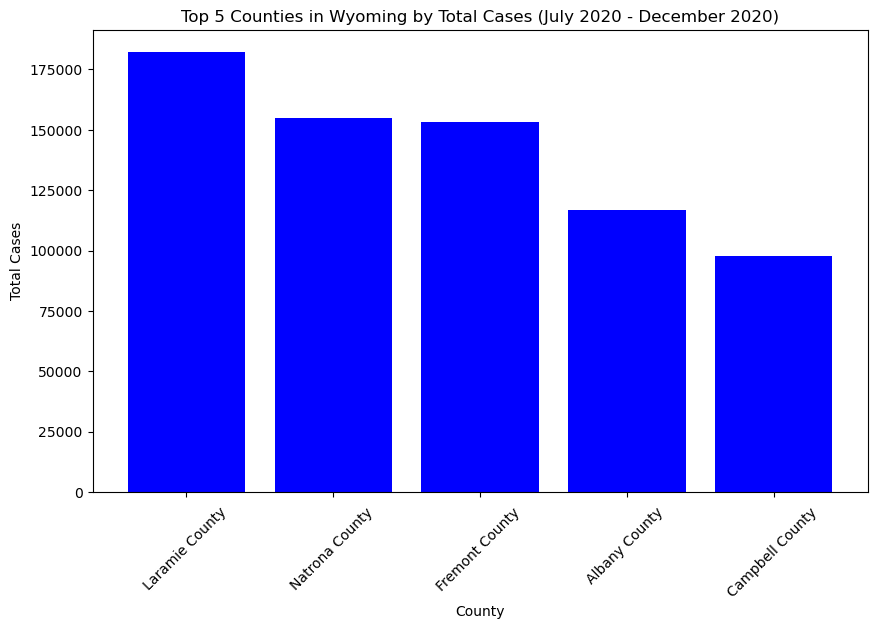

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(top_counties_cases['County Name_x'], top_counties_cases['total_cases'], color='blue')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.title('Top 5 Counties in Wyoming by Total Cases (July 2020 - December 2020)')
plt.xticks(rotation=45)
plt.show()

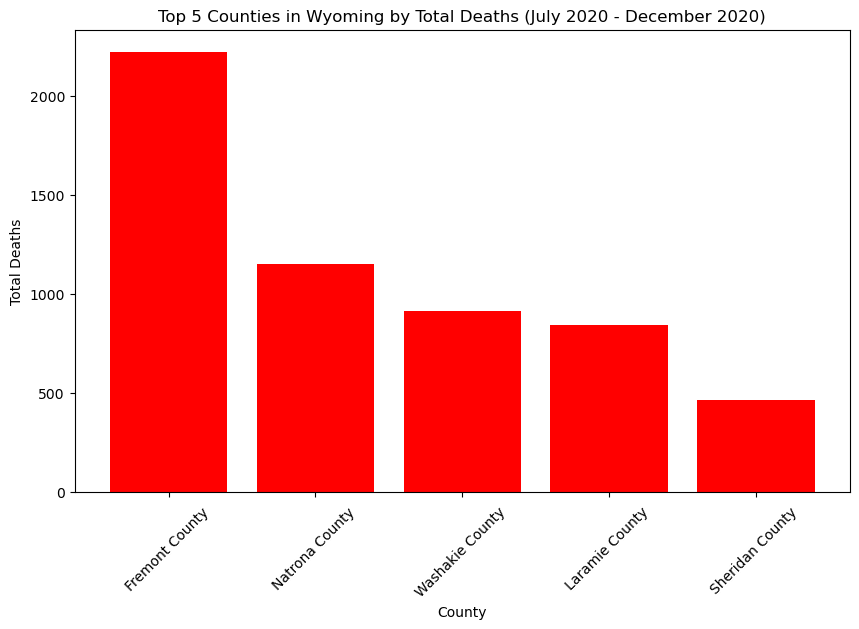

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(top_counties_deaths['County Name_x'], top_counties_deaths['total_deaths'], color='red')
plt.xlabel('County')
plt.ylabel('Total Deaths')
plt.title('Top 5 Counties in Wyoming by Total Deaths (July 2020 - December 2020)')
plt.xticks(rotation=45)
plt.show()

Q4

In [80]:
Laramie_df = super_data[super_data['County Name']== 'Laramie County' ]
Natrona_df = super_data[super_data['County Name']== 'Natrona County' ]
Fremont_df = super_data[super_data['County Name']== 'Fremont County' ]
Albany_df = super_data[super_data['County Name']== 'Albany County' ]
Campbell_df = super_data[super_data['County Name']== 'Campbell County' ]

#  Calculate the Top Five County sum

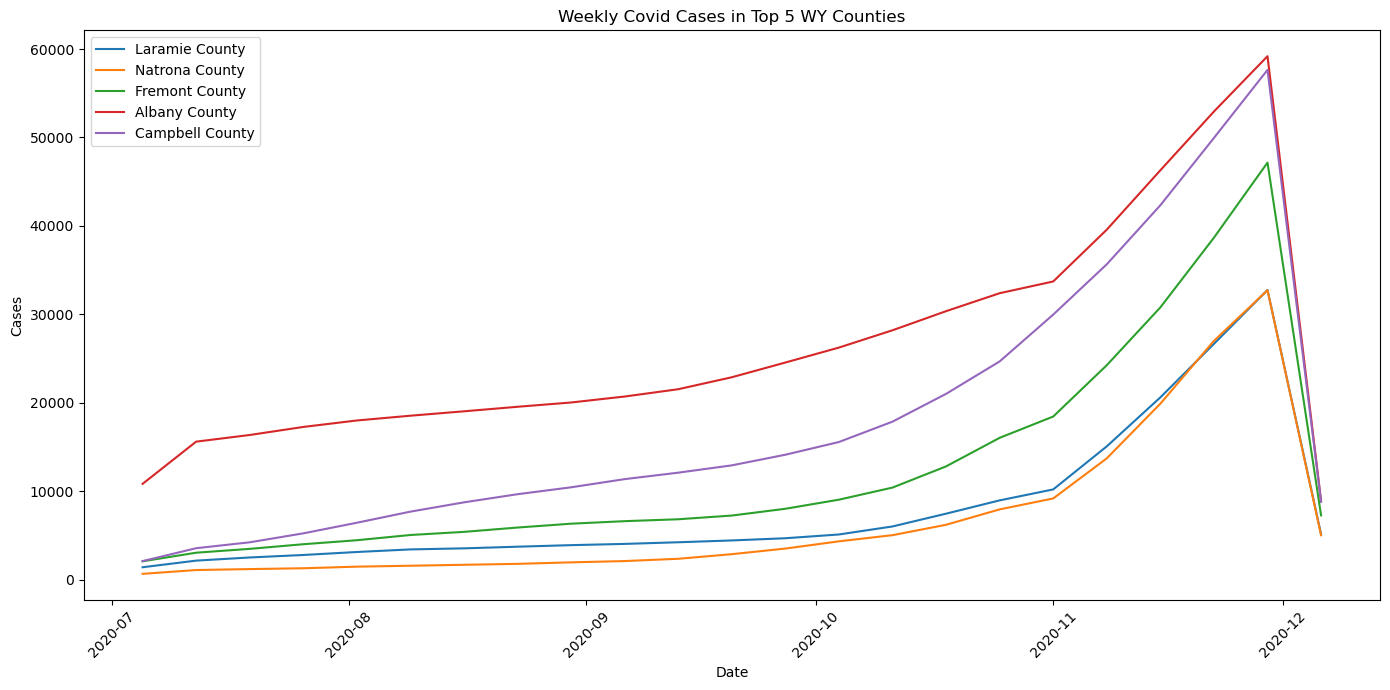

In [81]:
def calculate_weekly_stats_2(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])

    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))

    weekly_stats = weekly_data.sum()

    return weekly_stats

cases_Lara = calculate_weekly_stats_2(Laramie_df, columns_cases)
cases_Natrona = calculate_weekly_stats_2(Natrona_df, columns_cases)
cases_Fremont = calculate_weekly_stats_2(Fremont_df, columns_cases)
cases_Albany = calculate_weekly_stats_2(Albany_df, columns_cases)
cases_Campbell = calculate_weekly_stats_2(Campbell_df, columns_cases)

plt.figure(figsize=(14, 7))


plt.plot(cases_Lara.index, cases_Lara['count'], label="Laramie County")
plt.plot(cases_Natrona.index, cases_Natrona['count'], label="Natrona County")
plt.plot(cases_Fremont.index, cases_Fremont['count'], label="Fremont County")
plt.plot(cases_Albany.index, cases_Albany['count'], label="Albany County")
plt.plot(cases_Campbell.index, cases_Campbell['count'], label="Campbell County")

plt.title("Weekly Covid Cases in Top 5 WY Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

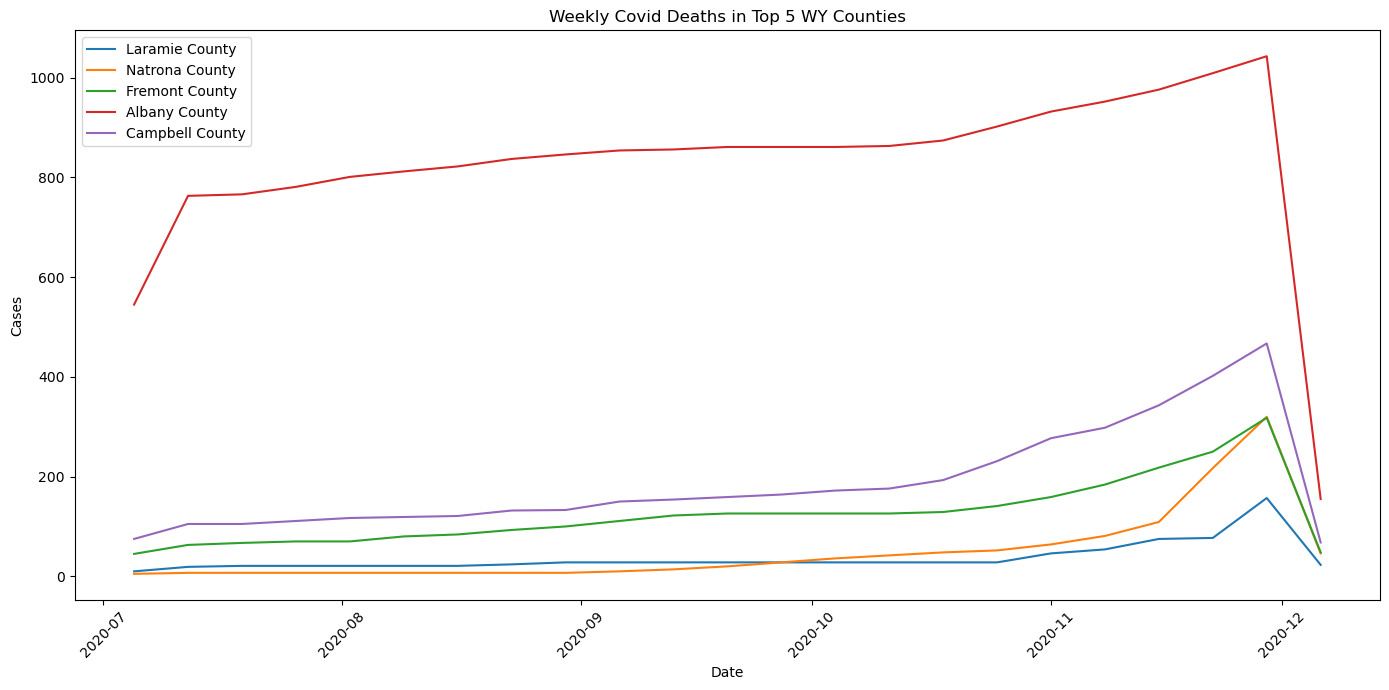

In [82]:
cases_Lara = calculate_weekly_stats_2(Laramie_df, columns_deaths)
cases_Natrona = calculate_weekly_stats_2(Natrona_df, columns_deaths)
cases_Fremont = calculate_weekly_stats_2(Fremont_df, columns_deaths)
cases_Albany = calculate_weekly_stats_2(Albany_df, columns_deaths)
cases_Campbell = calculate_weekly_stats_2(Campbell_df, columns_deaths)

plt.figure(figsize=(14, 7))


plt.plot(cases_Lara.index, cases_Lara['count'], label="Laramie County")
plt.plot(cases_Natrona.index, cases_Natrona['count'], label="Natrona County")
plt.plot(cases_Fremont.index, cases_Fremont['count'], label="Fremont County")
plt.plot(cases_Albany.index, cases_Albany['count'], label="Albany County")
plt.plot(cases_Campbell.index, cases_Campbell['count'], label="Campbell County")

plt.title("Weekly Covid Deaths in Top 5 WY Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

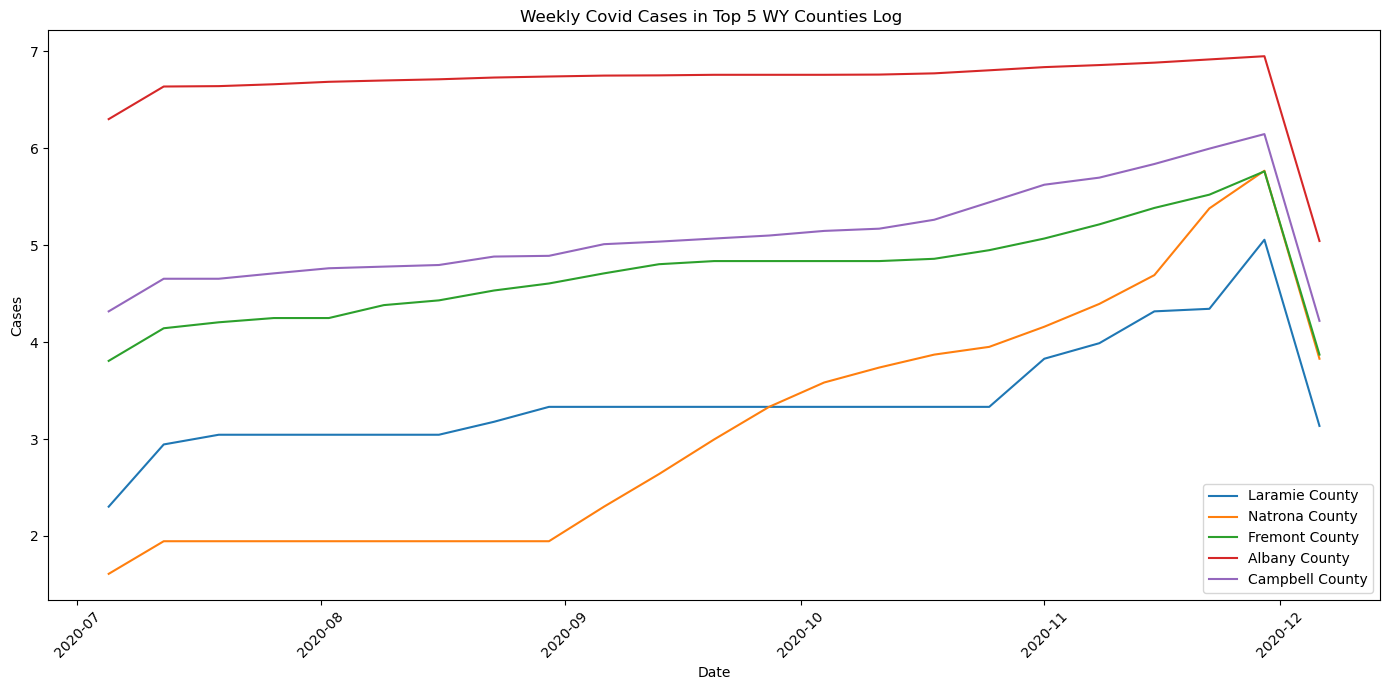

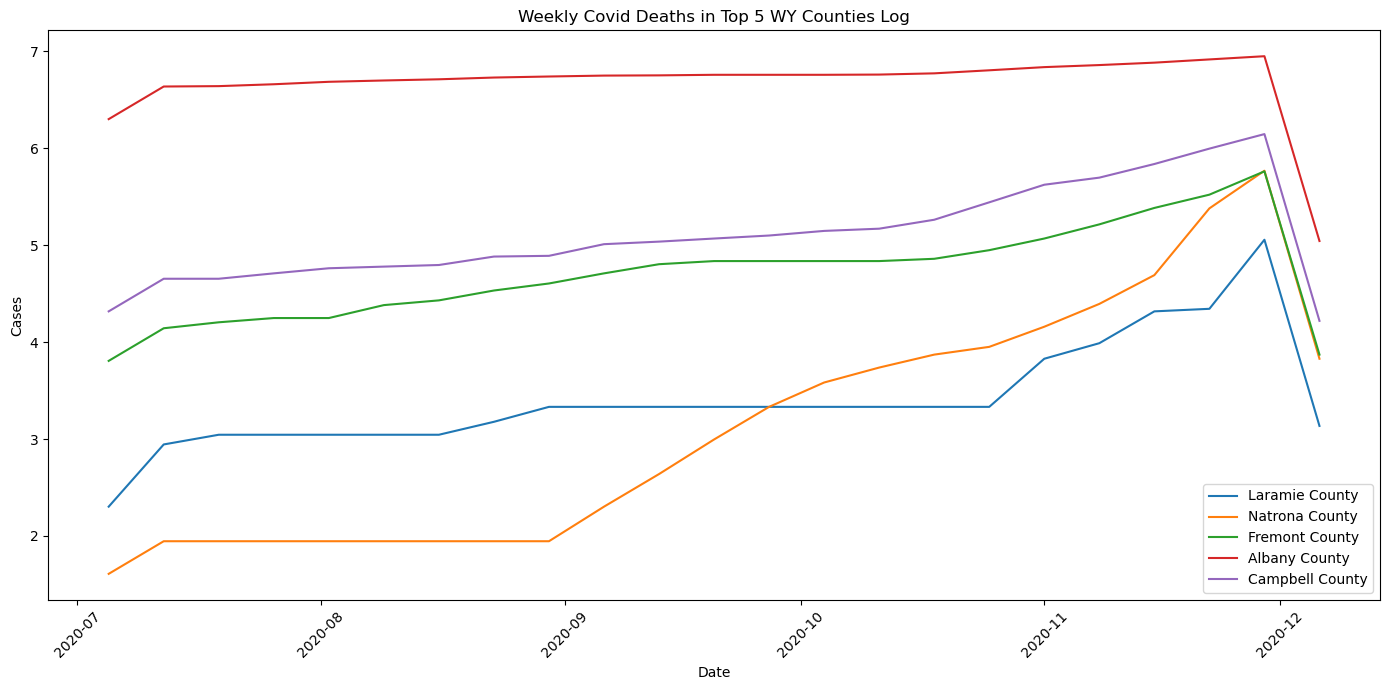

In [83]:
plt.figure(figsize=(14, 7))


plt.plot(cases_Lara.index, np.log(cases_Lara['count']), label="Laramie County")
plt.plot(cases_Natrona.index, np.log(cases_Natrona['count']), label="Natrona County")
plt.plot(cases_Fremont.index, np.log(cases_Fremont['count']), label="Fremont County")
plt.plot(cases_Albany.index, np.log(cases_Albany['count']), label="Albany County")
plt.plot(cases_Campbell.index, np.log(cases_Campbell['count']), label="Campbell County")

plt.title("Weekly Covid Cases in Top 5 WY Counties Log ")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))


plt.plot(cases_Lara.index, np.log(cases_Lara['count']), label="Laramie County")
plt.plot(cases_Natrona.index, np.log(cases_Natrona['count']), label="Natrona County")
plt.plot(cases_Fremont.index, np.log(cases_Fremont['count']), label="Fremont County")
plt.plot(cases_Albany.index, np.log(cases_Albany['count']), label="Albany County")
plt.plot(cases_Campbell.index, np.log(cases_Campbell['count']), label="Campbell County")

plt.title("Weekly Covid Deaths in Top 5 WY Counties Log")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of COVID-19 cases and deaths in Wyoming from July to December 2020 reveals a significant upward trend, with the most pronounced increases observed during the holiday season, notably in November and December. This pattern suggests a correlation between the holiday season , such as Thanksgiving,   Christmas and the spike in COVID-19 metrics. During this period, increased travel and family gatherings likely contributed to the spread of the virus. And the amount of the population in the county are increases more due the people in the same place, such as we can tell the Laramie County has the most population in the state and it the highest cases in the state.